In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


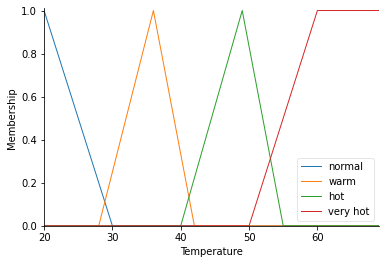

In [18]:
Temp=ctrl.Antecedent(np.arange(20,70,1),'Temperature')
Temp['normal']=fuzzy.trimf(Temp.universe,[20,20,30])
Temp['warm']=fuzzy.trimf(Temp.universe,[28,36,42])
Temp['hot']=fuzzy.trimf(Temp.universe,[40,49,55])
Temp['very hot']=fuzzy.trapmf(Temp.universe,[50,60,70,70])
Temp.view()
plt.show()

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


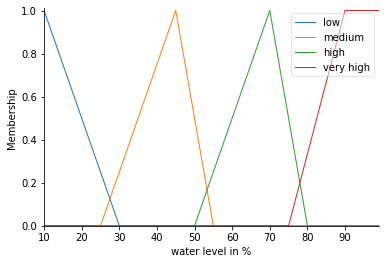

In [19]:
level=ctrl.Antecedent(np.arange(10,100,1),'water level in %')
level['low']=fuzzy.trimf(level.universe,[10,10,30])
level['medium']=fuzzy.trimf(level.universe,[25,45,55])
level['high']=fuzzy.trimf(level.universe,[50,70,80])
level['very high']=fuzzy.trapmf(level.universe,[75,90,100,100])

level.view()
plt.show()

c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


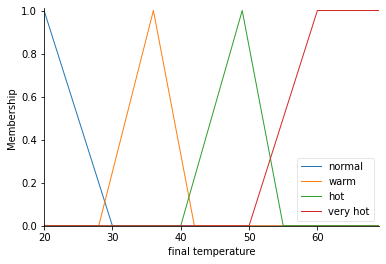

In [20]:
tempout=ctrl.Consequent(np.arange(20,70),'final temperature')
tempout['normal']=fuzzy.trimf(tempout.universe,[20,20,30])
tempout['warm']=fuzzy.trimf(tempout.universe,[28,36,42])
tempout['hot']=fuzzy.trimf(tempout.universe,[40,49,55])
tempout['very hot']=fuzzy.trapmf(tempout.universe,[50,60,70,70])
tempout.view()
plt.show()

In [21]:
rule1=ctrl.Rule(Temp['normal'] & level['low'], tempout['normal'])
rule2=ctrl.Rule(Temp['normal'] & level['medium'], tempout['normal'])
rule3=ctrl.Rule(Temp['normal'] & level['high'], tempout['normal'])
rule4=ctrl.Rule(Temp['normal'] & level['very high'], tempout['normal'])
rule5=ctrl.Rule(Temp['warm'] & level['low'], tempout['warm'])
rule6=ctrl.Rule(Temp['warm'] & level['medium'], tempout['normal'])
rule7=ctrl.Rule(Temp['warm'] & level['high'], tempout['normal'])
rule8=ctrl.Rule(Temp['warm'] & level['very high'], tempout['normal'])
rule9=ctrl.Rule(Temp['hot'] & level['low'], tempout['hot'])
rule10=ctrl.Rule(Temp['hot'] & level['medium'], tempout['warm'])
rule11=ctrl.Rule(Temp['hot'] & level['high'], tempout['normal'])
rule12=ctrl.Rule(Temp['hot'] & level['very high'], tempout['normal'])
rule13=ctrl.Rule(Temp['very hot'] & level['low'], tempout['very hot'])
rule14=ctrl.Rule(Temp['very hot'] & level['medium'], tempout['hot'])
rule15=ctrl.Rule(Temp['very hot'] & level['high'], tempout['warm'])
rule16=ctrl.Rule(Temp['very hot'] & level['very high'], tempout['normal'])

rule=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16]

In [22]:
x=ctrl.ControlSystem(rule)
y=ctrl.ControlSystemSimulation(x)

Temperature should be between 20-80 degree69
water leve should be between 10-100 %35


c:\users\shree\appdata\local\programs\python\python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


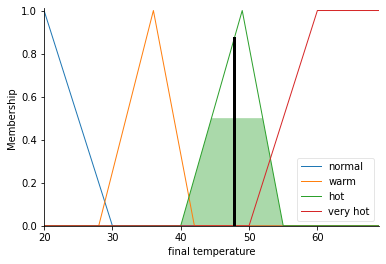

Final water Temperature is 47.833333333333336


In [23]:
y.input['Temperature']=int(input("Temperature should be between 20-80 degree"))
y.input['water level in %']=int(input("water leve should be between 10-100 %"))
y.compute()
tempout.view(sim=y)
plt.show()
print("Final water Temperature is",y.output['final temperature'])
